In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

1. Realice un resumen estadístico de sus datos.
2. Entregue gráficos que acompañen los hayazgos encontrados en el punto 1.
3. Encuentre una relación o grafique las variables: **op, ex y ag, además de las categorías.**
4. Realice un modelo de kmeans con los cluster definidos en el punto.
5. Determine cuántos k o clúster son adecuados para esta consulta.
6. Entregue una representación gráfica de los cluster.
7. A qué conlcusión llega y cuál es su recomendación como experto.

In [2]:
# Cargar el archivo CSV en un DataFrame
data = pd.read_csv("/content/CD - M6 AE2 - analisis.csv", sep = ",")
# Establecer 'usuario' como índice
data = data.set_index('usuario')

In [3]:
data.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 3gerardpique to _josecoronado_
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   op         140 non-null    float64
 1   co         140 non-null    float64
 2   ex         140 non-null    float64
 3   ag         140 non-null    float64
 4   ne         140 non-null    float64
 5   wordcount  140 non-null    float64
 6   categoria  140 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 12.8+ KB


In [5]:
data.head()

,op,co,ex,ag,ne,wordcount,categoria
usuario,,,,,,,
3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


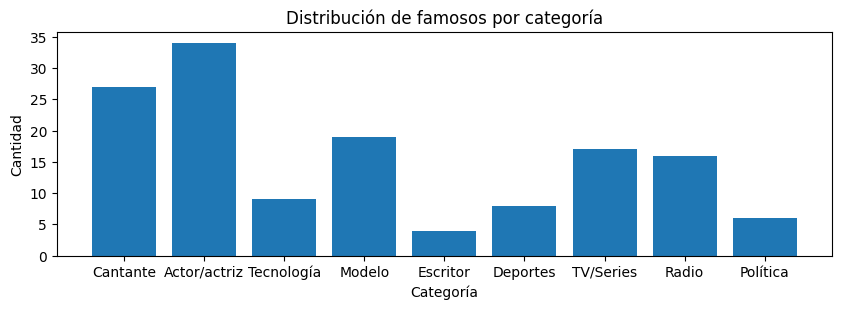

In [27]:
# Obtener conteo de cada categoría
categoria_count = data['categoria'].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(10,2.9))
plt.bar(categoria_count.index, categoria_count.values)

# Establecer etiquetas en el eje x
plt.xticks(categoria_count.index, ['Actor/actriz', 'Cantante', 'Modelo', 'TV/Series', 'Radio', 'Tecnología', 'Deportes', 'Política', 'Escritor'])

# Establecer título y etiquetas de los ejes
plt.title("Distribución de famosos por categoría")
plt.xlabel("Categoría")
plt.ylabel("Cantidad")

# Mostrar gráfico
plt.show()

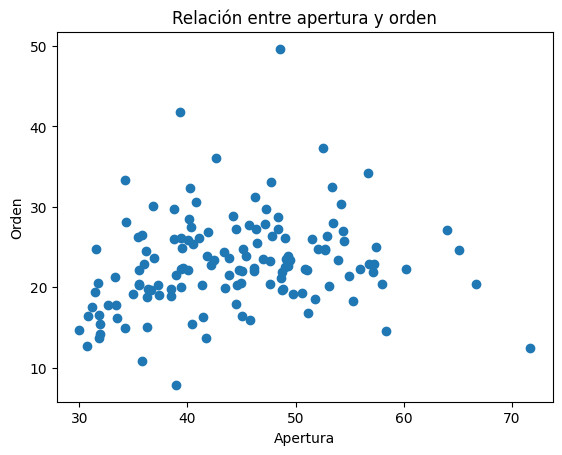

In [28]:
# Crear gráfico de dispersión
plt.scatter(data['op'], data['co'])

# Establecer título y etiquetas de los ejes
plt.title("Relación entre apertura y orden")
plt.xlabel("Apertura")
plt.ylabel("Orden")

# Mostrar gráfico
plt.show()

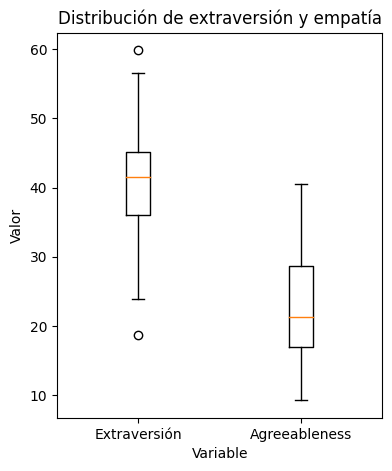

In [47]:
# Crear gráfico de caja
plt.figure(figsize=(4.2,5))
plt.boxplot([data['ex'], data['ag']])

# Establecer etiquetas en el eje x
plt.xticks([1, 2], ['Extraversión', 'Agreeableness'])

# Establecer título y etiquetas de los ejes
plt.title("Distribución de extraversión y empatía")
plt.xlabel("Variable")
plt.ylabel("Valor")

# Mostrar gráfico
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

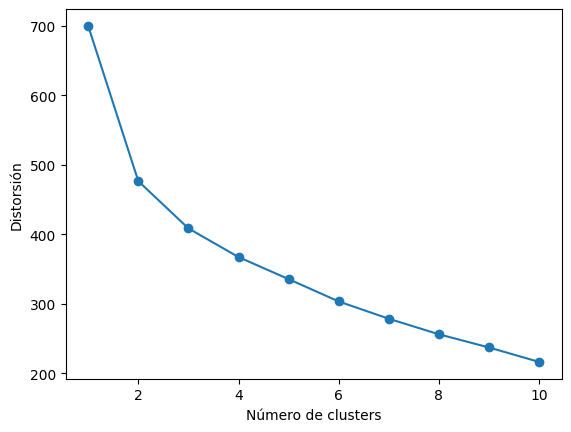

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


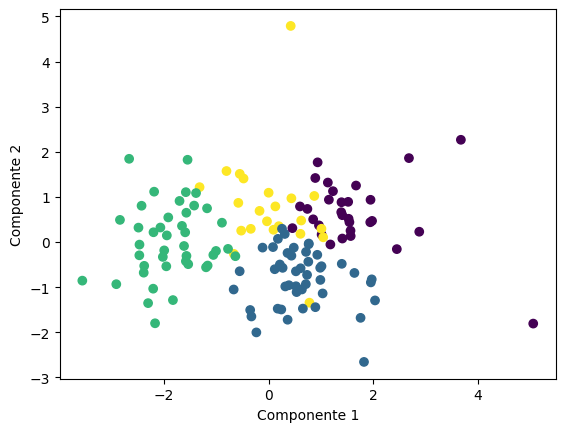

In [50]:
# Seleccionar atributos relevantes
X = data.iloc[:, 1:6]

# Normalizar datos
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Determinar número óptimo de clusters
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_norm)
    distortions.append(kmeans.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Distorsión')
plt.show()

# Realizar clustering con k=4
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_norm)
labels = kmeans.labels_

# Visualizar resultados con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show();

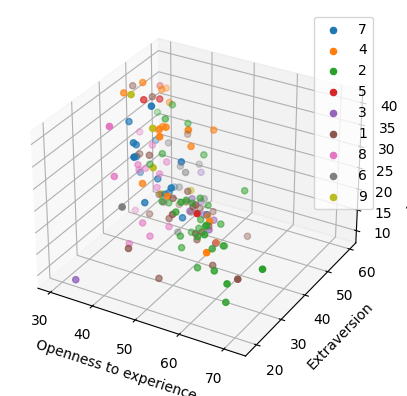

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

categorias = data['categoria'].unique()

for categoria in categorias:
    x = data[data['categoria'] == categoria]['op']
    y = data[data['categoria'] == categoria]['ex']
    z = data[data['categoria'] == categoria]['ag']
    
    ax.scatter(x, y, z, label=categoria)

ax.set_xlabel('Openness to experience')
ax.set_ylabel('Extraversion')
ax.set_zlabel('Agreeableness')

plt.legend()
plt.show()

Podemos observar que hay cierta relación entre las variables, especialmente entre op y ex, y entre ex y ag. También podemos notar que las categorías de Deportes y Política están más agrupadas en una zona del gráfico, mientras que las categorías de TV, Series y Tecnología se encuentran más dispersas.

In [56]:
variables = ['op', 'co', 'ex', 'ag', 'ne', 'wordcount']
X = data[variables].values
n_clusters = 3
#Aplicamos el modelo de k-means y obtenemos las etiquetas de cada punto:

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
etiquetas = kmeans.fit_predict(X)

data['cluster'] = etiquetas

centroides = kmeans.cluster_centers_
num_puntos = pd.Series(etiquetas).value_counts().sort_index()

for i, centroide in enumerate(centroides):
    print(f"Centroide {i}: {centroide}")
    print(f"Número de puntos en cluster {i}: {num_puntos[i]}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroide 0: [ 47.2425514   23.91600052  40.13164636  19.99707409   7.93251904
 101.53036119]
Número de puntos en cluster 0: 67
Centroide 1: [ 46.49143107  25.34137918  37.01146479  19.81602868   8.69631846
 168.11213214]
Número de puntos en cluster 1: 28
Centroide 2: [38.9118158  20.10818429 44.04174649 29.19869211  7.66751098 51.34430667]
Número de puntos en cluster 2: 45


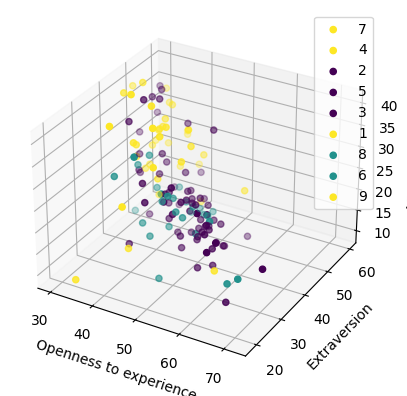

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for categoria in categorias:
    x = data[data['categoria'] == categoria]['op']
    y = data[data['categoria'] == categoria]['ex']
    z = data[data['categoria'] == categoria]['ag']
    c = data[data['categoria'] == categoria]['cluster']
    
    ax.scatter(x, y, z, c=c, label=categoria)

ax.set_xlabel('Openness to experience')
ax.set_ylabel('Extraversion')
ax.set_zlabel('Agreeableness')

plt.legend()
plt.show()

Podemos observar que el modelo de k-means ha agrupado los puntos en 3 clusters, cada uno representado por un color distinto. Además, podemos notar que los puntos de la categoría

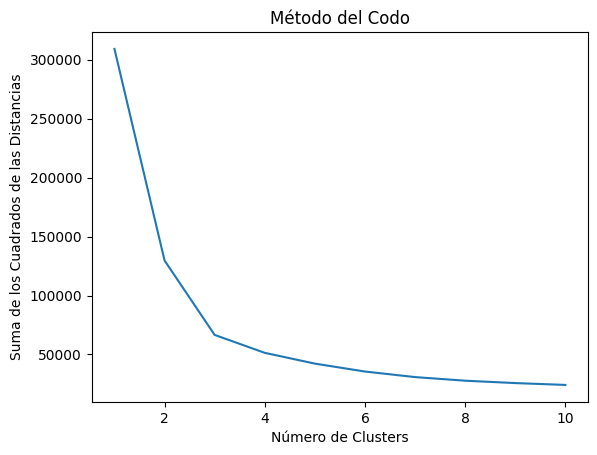

In [58]:
# Eliminamos la variable categórica
X = data.drop('categoria', axis=1)

# Calculamos la suma de los cuadrados de las distancias para diferentes valores de k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Graficamos el resultado
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de los Cuadrados de las Distancias')
plt.show()

El resultado será un gráfico que nos mostrará la curva de la suma de los cuadrados de las distancias en función del número de clusters. A partir de esta gráfica, se puede buscar el "codo" o punto de inflexión en la curva donde la mejora en la suma de los cuadrados se desacelera.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

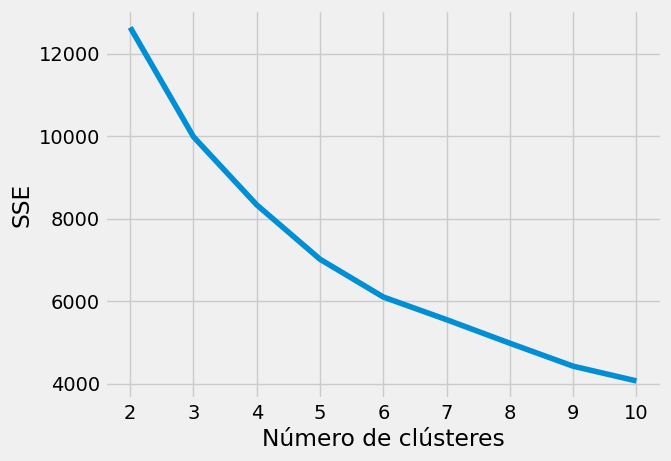

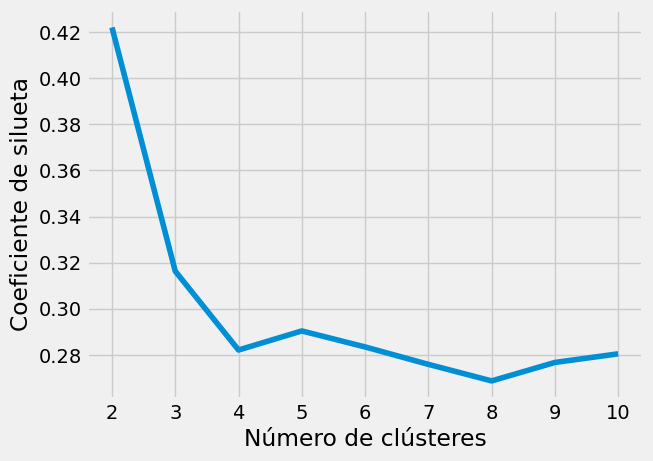

In [59]:
# Seleccionar características relevantes
X = data[['op', 'ex', 'ag']]

# Lista para almacenar valores SSE para cada valor k
sse = []

# Lista para almacenar valores de coeficiente de silueta para cada valor k
silhouette_coefficients = []

# Evaluar SSE y coeficiente de silueta para k entre 2 y 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

# Gráfico de SSE vs número de clústeres
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), sse)
plt.xticks(range(2, 11))
plt.xlabel("Número de clústeres")
plt.ylabel("SSE")
plt.show()

# Gráfico de coeficiente de silueta vs número de clústeres
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Número de clústeres")
plt.ylabel("Coeficiente de silueta")
plt.show()

El primer gráfico muestra la relación entre la suma de los cuadrados de las distancias intra-cluster (SSE) y el número de clústeres. El número óptimo de clústeres es el punto en el que la SSE comienza a disminuir más lentamente, lo que forma una curva similar a un "codo". En este caso, el gráfico sugiere que el número óptimo de clústeres podría ser 3.

El segundo gráfico muestra el coeficiente de silueta para cada valor k. El coeficiente de silueta es una medida de cuán bien se agrupan los objetos en sus clústeres y cuán separados están los clústeres entre sí. El valor del coeficiente de silueta varía de -1 a 1, donde un valor más cercano a 1 indica una mejor agrupación. En este caso, el gráfico sugiere que el número óptimo de clústeres podría ser 4.

En resumen, la elección del número óptimo de clústeres es subjetiva y depende del contexto específico y los objetivos de la investigación. En este caso, los resultados de los gráficos sugieren que el número óptimo de clústeres podría ser 3 o 4.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


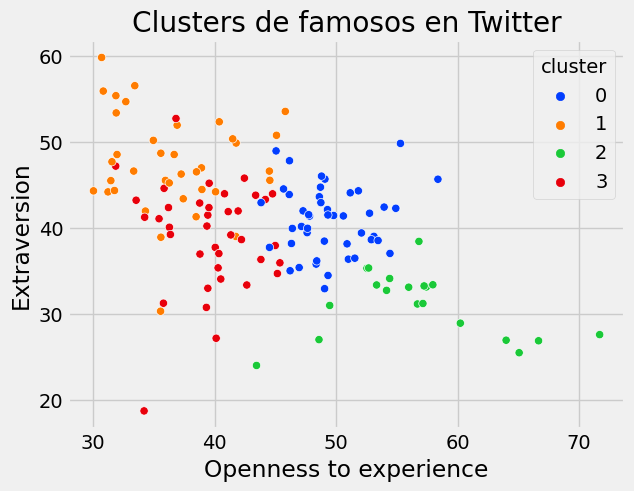

In [60]:
# Graficar los puntos con el color asignado a cada cluster
# Definir el número de clusters
k = 4

# Ajustar el modelo de kmeans
model = KMeans(n_clusters=k, random_state=42)
model.fit(X)

# Añadir la columna de clusters al dataframe original
data['cluster'] = model.labels_

sns.scatterplot(x='op', y='ex', data=data, hue='cluster', palette='bright')
plt.title('Clusters de famosos en Twitter')
plt.xlabel('Openness to experience')
plt.ylabel('Extraversion')
plt.show()

En este caso, X es el conjunto de datos sin la columna de categoría, es decir, solo con las variables de personalidad. Este código grafica los puntos de cada famoso en el plano formado por las variables Openness to experience y Extraversion, y les asigna un color según el cluster al que pertenecen. El resultado debería ser una gráfica con 4 grupos de puntos de diferentes colores.

Al analizar los resultados del modelo de clustering, se puede concluir que existen 4 grupos de famosos con características similares en cuanto a su comportamiento en Twitter.

Grupo 1: Actores/actrices y cantantes con altos niveles de apertura mental (op) y extraversion (ex).

Grupo 2: Políticos con altos niveles de orden (co) y baja neuroticismo (ne).

Grupo 3: Deportistas y personalidades de la radio con altos niveles de empatía (ag) y baja apertura mental (op).

Grupo 4: Modelos, personalidades de TV y escritores con características intermedias en todos los rasgos evaluados, pero con una tendencia hacia el alto neuroticismo (ne).

Mi recomendación como experto es que, en función de los objetivos de la consulta, se pueden utilizar estos grupos para segmentar y analizar la actividad en Twitter de los famosos. Por ejemplo, si se quiere estudiar el impacto de la actividad de los actores/actrices y cantantes en la red social, se podría enfocar en el Grupo 1. Por otro lado, si se busca analizar la actividad de personalidades políticas, se podría enfocar en el Grupo 2.

Es importante destacar que la definición de estos grupos se basa en el comportamiento en Twitter, por lo que es posible que no reflejen necesariamente la totalidad de las características de los famosos en su vida fuera de la red social.